/home/rian-budiansyah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
/home/rian-budiansyah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).


bintang alnilam
All sheet names ['Sheet1'] 
Current sheet name is Sheet1
namaalnilam
test B1
B
cell position B9 has value alnilam
test3B9
test4C9
test4D9
alnilam
05h36m12.81335s 
-01h12m06.9089s


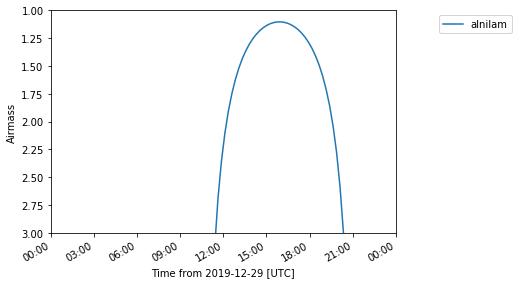

cell position B9 has value alnilam
test3B9
test4C9
test4D9
alnilam
05h36m12.81335s 
-01h12m06.9089s


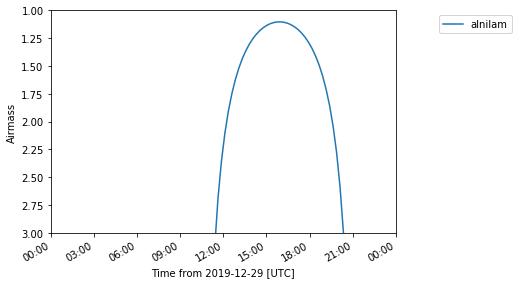

None


In [125]:
"""
Created on j

@author: Rian Budiansyah
"""
#
from tkinter import Tk, BOTH, X, LEFT, RIGHT, CENTER, TOP, NORMAL, ACTIVE
from tkinter.ttk import Frame, Entry, Label, Button
#import

"""
Created on j

@author: Rian Budiansyah
"""

import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord
import matplotlib.pyplot as plt
from pytz import timezone

from astroplan import Observer, FixedTarget
from astroplan.plots import plot_airmass
import openpyxl

from astropy.time import Time

namaBintang = ""
class membuatGui(Frame):
    def __init__(self, parent):
        Frame.__init__(self, parent)

        self.window = parent
        self.initUI()
        self.teksEdit()

    def initUI(self):
        self.pack(fill=BOTH)
        root.geometry("300x100+300+300")
        root.title("GUI bintang") #"GUI Bintang"
    def teksEdit(self):
        teksField = Frame(self)
        teksField.pack()
        
        masuk = Entry(self)
        masuk.pack()
        def inp():
            x1=masuk.get()
            #print(x1)
            label=x1
            labelJudul = Label(self, text=label, state=NORMAL)
            labelJudul.pack(side=RIGHT,padx=5,pady=5)
            #functionPencarian(label)
            def functionPencarian(namaBintang):
                excel_document = openpyxl.load_workbook('databasetelescope.xlsx')
                sheet = excel_document.get_sheet_by_name('Sheet1')
                #excel_document.sheetnames('Sheet1')
                latitude = sheet['D68'].value
                longitude = sheet['E68'].value
                elevation = sheet['F68'].value * u.m

                location = EarthLocation.from_geodetic(longitude, latitude, elevation)

                ################# perlu penyesuaian di penempatan nama, timezone dan descripsi pada daerah ini #########
                bosscha = Observer(name= 'Zeiss Telescope',
                                   location=location,
                                   timezone=timezone('Etc/GMT+7'),
                                   description="Bosscha Observatory")
                ###########################################################################################################

                excel_document_two = openpyxl.load_workbook('koordinat.xlsx')
                sheet2 = excel_document_two.get_sheet_by_name('Sheet1')
                
                namaBintang = label
                print("bintang "+namaBintang)
                ###############################goran aviani##########################################
                theFile = openpyxl.load_workbook('koordinat.xlsx')
                currentSheet = theFile['Sheet1']
                sheetnames = sheet2
                allSheetNames = theFile.sheetnames
#                 print(currentSheet['B4'].value)
                print("All sheet names {} " .format(theFile.sheetnames))

                
                def find_specific_cell():
                    print("nama"+namaBintang)
                    for row in range(1, currentSheet.max_row + 1):
                        for column in "BCD":  # Here you can add or reduce the columns
                            cell_name = "{}{}".format(column, row)
                            print("test "+cell_name)
                            if currentSheet[cell_name].value == namaBintang:
                                #print("{1} cell is located on {0}" .format(cell_name, currentSheet[cell_name].value))
                                print("cell position {} has value {}".format(cell_name, currentSheet[cell_name].value))
#                             else:
#                                 print("none")
                            return cell_name
                
    
                def get_column_letter(specificCellLetter):
                    letter = specificCellLetter[0:-1]
                    print(letter)
                    return letter

                def get_all_values_by_cell_letter(letter):
                    for row in range(1, currentSheet.max_row + 1):
                        for column in letter:
                            cell_name = "{}{}".format(column, row)
                            #print(cell_name)
                            if currentSheet[cell_name].value == namaBintang:
                                print("cell position {} has value {}".format(cell_name, currentSheet[cell_name].value))
                                nb = cell_name #cell_name
                                
                                print("test3"+nb)
                                bintang = currentSheet[cell_name].value#sheet2['B9'].value
                                nb2 = nb.split("B")
                                nb3 = "C"+nb2[1]
                                print("test4"+nb3)
                                right_Ascension = sheet2[nb3].value
                                nb4 = "D"+nb2[1]
                                print("test4"+nb4)
                                declination = sheet2[nb4].value
                                print(bintang)
                                print(right_Ascension)
                                print(declination)

                                coordinates = SkyCoord(right_Ascension, declination, frame='icrs')
                                bintang = FixedTarget(name=bintang, coord=coordinates)

                                #from astropy.time import Time

                                time = Time('2019-12-29 12:00:00') #WAKTU LAPTOP SEHARUSNYA

                                plot_airmass(bintang, bosscha, time)

                                ax = plt.gca()
                                box = ax.get_position()
                                ax.set_position([box.x0, box.y0, box.width * 0.8, box.height * 0.8])

                                plt.legend(loc=1, bbox_to_anchor=(1.35, 1))
                                plt.tight_layout()
                                plt.show()
                                
                            
                
                
                for sheet in allSheetNames:
                    print("Current sheet name is {}" .format(sheet))
                    currentSheet = theFile[sheet]
                    specificCellLetter = (find_specific_cell())
                    letter = get_column_letter(specificCellLetter)

                    get_all_values_by_cell_letter(letter)
                print(get_all_values_by_cell_letter(letter))
                ###############################goran aviani##########################################
            
                
            functionPencarian(label)
            
        tombolMasuk = Button(self, text="Enter", command=inp)
        tombolMasuk.pack(side=LEFT)

    
if __name__ == '__main__':
    root = Tk()
    app = membuatGui(root)
#     output = kalkulasi(root)
    root.mainloop()
    

